In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600,
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500,
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290,
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300,
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990,
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950,
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450,
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610,
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

##### 이 데이터를 구간별로 나누고자 합니다. 이러한 기법을 구간화(Data binning 혹은 bucketing)이라고 부릅니다

In [4]:
salary.head()

0    4300
1    8370
2    1750
3    3830
4    1840
dtype: int64

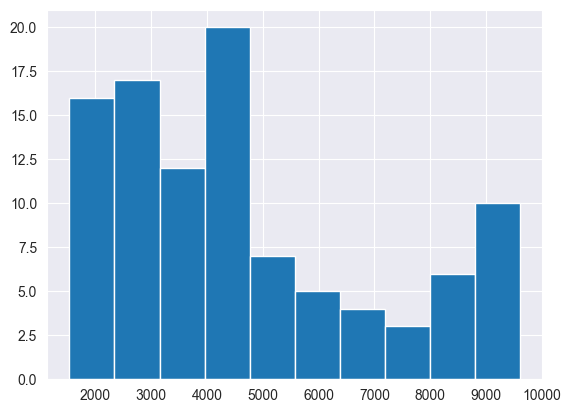

In [6]:
salary.hist()
plt.show()

In [7]:
# 구간 설정
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [8]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [10]:
# 단순 카테고리 확인
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [12]:
# 구간별로 몇개 있는지 확인하기
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
Name: count, dtype: int64

In [13]:
# bins구간에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 지정한 갯수만큼 나누어줌
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [14]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
Name: count, dtype: int64

In [15]:
# qcut은 데이터의 분포를 비슷한 크기의 그룹으로 나눔
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [16]:
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
Name: count, dtype: int64
